## 複数サブプロット
１つのプロットの中に複数の軸のグループを配置するサブプロットの概念を提供している。<br>
これらのサブプロットは、はめ込み、プロットのグリッド、などで構成されている。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### plt.axes:サブプロットのマニュアル作成

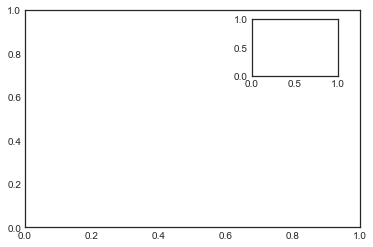

In [6]:
ax1 = plt.axes() # 標準の軸
# x軸とy軸の位置を0.65(図形の幅と高さの65%から始める)
# xとyの範囲0.2（軸のサイズを元の幅と高さの20%）
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) 

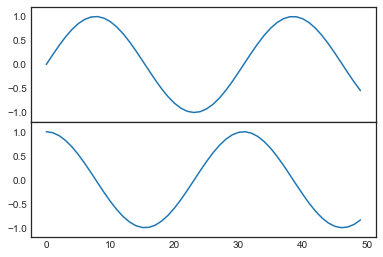

In [8]:
# オブジェクト指向インターフェースではfig.add_axes()を使用する。
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

### plt.subplot:サブプロットの単純なグリッド
このメソッドは行の数、列の数、サブプロットのインデクス（左上から右下へ順に値を割り当てる）の引数を渡す。

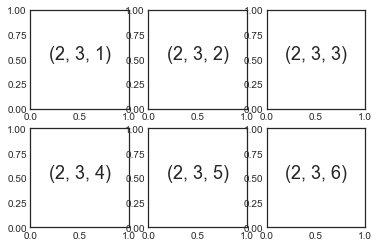

In [9]:
for i in range(1,7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
                    fontsize=18, ha='center')

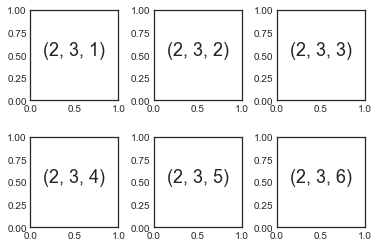

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4) # プロットの間隔を調整
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
                    fontsize=18, ha='center')

### plt.subplots:グリッド全体を一度に作成する
サブプロットのグリッドを作成し、Numpy配列として返す。<br>
引数は、行数と列数、およびオプションのキーワード引数として、sharexとshareyがある

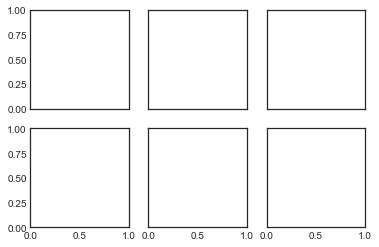

In [11]:
# 同じ列の全ての軸がx軸を共有する２×３グリッドのサブプロットを作成
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

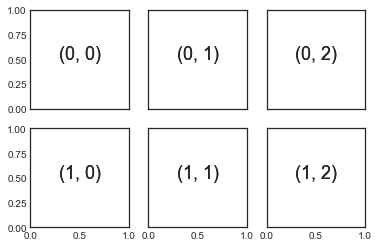

In [13]:
# axはNumPy配列として返され、標準の配列インデクスで目的の軸を指定できる。
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                    fontsize=18, ha='center')
fig

### plt.GridSpec:より複雑な配置
複数の行や列にまたがるプロットを作成するときに使用する。

In [15]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

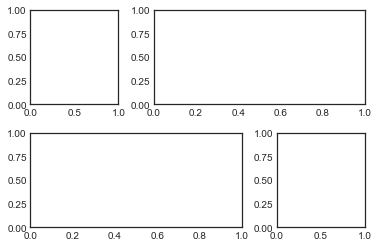

In [16]:
# スライスでサブプロットの位置と範囲を指定できる。
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

In [20]:
# 多軸ヒストグラムの作成例
mean = [0, 1]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

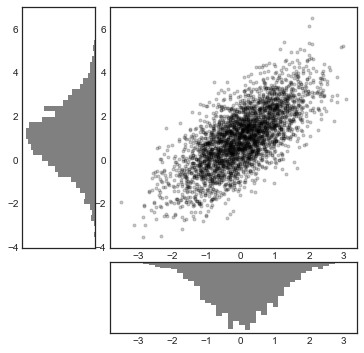

In [21]:
# gridspecによる軸配列を作成
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# 主軸に散布図をプロット
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# ヒストグラムをプロット
x_hist.hist(x, 40, histtype='stepfilled',
                   orientation='vertical', color='gray')
x_hist.invert_yaxis()
y_hist.hist(y, 40, histtype='stepfilled',
                   orientation='horizontal', color='gray')
y_hist.invert_xaxis()

上記のプロットはよく使用されるため、Seabornに専用のAPIがある